In [1]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

import tensorflow as tf

import nengo
from nengo.utils.matplotlib import rasterplot

import hgtk
 
%matplotlib inline
 
audio_path = '4_3273.wav'


In [2]:
y, sr = librosa.load(audio_path)

In [3]:
IPython.display.Audio(data=y, rate=sr)

In [4]:
total_cho = hgtk.josa.CHO
total_joong = hgtk.josa.JOONG
total_jong = hgtk.josa.JONG
print(total_cho)
print(total_joong)
print(total_jong)


('ㄱ', 'ㄲ', 'ㄴ', 'ㄷ', 'ㄸ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅃ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ')
('ㅏ', 'ㅐ', 'ㅑ', 'ㅒ', 'ㅓ', 'ㅔ', 'ㅕ', 'ㅖ', 'ㅗ', 'ㅘ', 'ㅙ', 'ㅚ', 'ㅛ', 'ㅜ', 'ㅝ', 'ㅞ', 'ㅟ', 'ㅠ', 'ㅡ', 'ㅢ', 'ㅣ')
('', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄵ', 'ㄶ', 'ㄷ', 'ㄹ', 'ㄺ', 'ㄻ', 'ㄼ', 'ㄽ', 'ㄾ', 'ㄿ', 'ㅀ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ')


In [5]:
ori_sent = '저희 가게의 손님은 주로 외국인이에요'
import hgtk
 
jamo_sent = hgtk.text.decompose(ori_sent)
jamo_sent = jamo_sent.replace('ᴥ', '')
print(jamo_sent + '\n')

many_hot = np.zeros(len(total_cho + total_joong + total_jong))
sent_hot = np.zeros((len(ori_sent),len(many_hot)))
word_idx = 0

for word in ori_sent:
    #print("input_word: " + str(word))
    if(hgtk.checker.is_hangul(word)):
        split_word = hgtk.letter.decompose(word)
        cho_idx = 0
        joong_idx = 0
        jong_idx = 0
        one_hot_cho = np.zeros(len(hgtk.josa.CHO))
        one_hot_joong = np.zeros(len(hgtk.josa.JOONG))
        one_hot_jong = np.zeros(len(hgtk.josa.JONG))
        if(len(split_word) > 2):
            for cho in total_cho:
                if(cho == split_word[0]):
                    one_hot_cho[cho_idx] = 1
                    break
                else:
                    cho_idx+= 1
            for joong in total_joong:
                if(joong == split_word[1]):
                    one_hot_joong[joong_idx] = 1
                    break
                else:
                    joong_idx+= 1
            for jong in total_jong:
                if(jong == split_word[2]):
                    one_hot_jong[jong_idx] = 1
                    break
                else:
                    jong_idx+= 1
        else:
            for cho in total_cho:
                if(cho == split_word[0]):
                    one_hot_cho[cho_idx] = 1
                    break
                else:
                    cho_idx+= 1
            for joong in total_joong:
                if(joong == split_word[1]):
                    one_hot_joong[joong_idx] = 1
                    break
                else:
                    joong_idx+= 1
        many_hot = np.append(one_hot_cho, one_hot_joong)
        many_hot = np.append(many_hot, one_hot_jong)
        
    else:
        many_hot = np.zeros(len(total_cho + total_joong + total_jong))
    sent_hot[word_idx] = many_hot
    word_idx += 1

print(sent_hot.shape)
print(len(ori_sent))

ㅈㅓㅎㅢ ㄱㅏㄱㅔㅇㅢ ㅅㅗㄴㄴㅣㅁㅇㅡㄴ ㅈㅜㄹㅗ ㅇㅚㄱㅜㄱㅇㅣㄴㅇㅣㅇㅔㅇㅛ

(20, 68)
20


In [6]:
sent_hot.shape[0]

20

In [13]:
def fill_mid_char(mel, voice):
    voice_char_len = voice.shape[0]
    voice_vector_len = voice.shape[1]
    mel_x_len = 
    for char
    

SyntaxError: invalid syntax (<ipython-input-13-6e13eff885ff>, line 4)

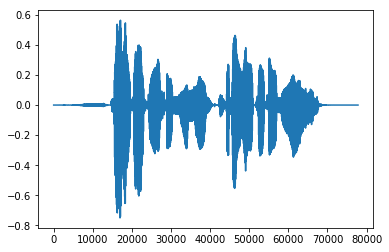

In [7]:
plt.figure()
plt.plot(y)

In [8]:
time_duration = int(librosa.get_duration(y=y, sr=sr) * 1000)
data_length = y.shape[0]
print("time duration: " + str(time_duration) + " ms")
print("sampling rate: " + str(sr))
print("data length: " + str(data_length))

time duration: 3529 ms
sampling rate: 22050
data length: 77824


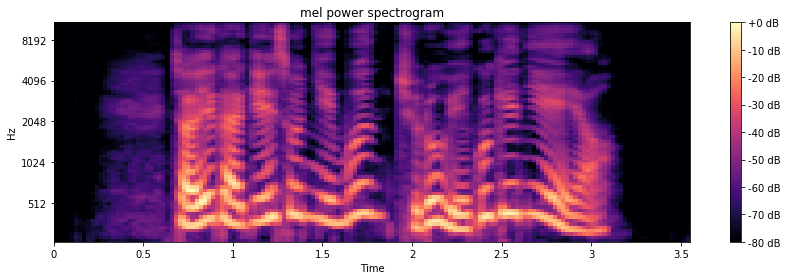

In [26]:
nMels = 80
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=nMels) 
 
log_S = librosa.logamplitude(S, ref_power=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()


In [27]:
def half_normalize(S):
    return (S - S.min()/2) / (-S.min()/2)

def simple_normalize(S):
    return (S - S.min()) / (-S.min())

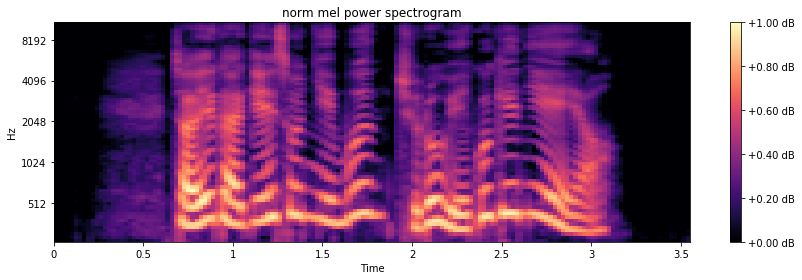

In [28]:
#norm_S = half_normalize(log_S)
norm_S = simple_normalize(log_S)
 
plt.figure(figsize=(12, 4))
librosa.display.specshow(norm_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('norm mel power spectrogram')
plt.colorbar(format='%+0.2f dB')
plt.tight_layout()
plt.show()

In [29]:
transposed_norm_S = norm_S.transpose()
frame_size = int(time_duration/transposed_norm_S.shape[0])+1

print(transposed_norm_S.shape)
print(transposed_norm_S)

(153, 80)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.06417233 0.05027841 0.         ... 0.         0.         0.        ]
 [0.12052688 0.10115915 0.01960031 ... 0.         0.         0.        ]]


In [30]:
def voice_input(t):
    ms = int(t * 1000)
    frame_num = int(ms / frame_size)
    voice = transposed_norm_S[frame_num]
    return voice

In [31]:
neuron_number = 80
hidden_neuron_number = 120
output_neuron_number = 68
with nengo.Network() as net:
    voice = nengo.Node(output=voice_input)
    neuronsEns = nengo.Ensemble(neuron_number, dimensions=neuron_number, max_rates=([100] * neuron_number))
    neuronsEns2 = nengo.Ensemble(hidden_neuron_number, dimensions=hidden_neuron_number, max_rates=([100] * hidden_neuron_number))
    neuronsEns3 = nengo.Ensemble(output_neuron_number, dimensions=output_neuron_number, max_rates=([100] * output_neuron_number))

    weights = np.random.normal(size=(neuronsEns2.n_neurons, neuronsEns.n_neurons))
    weights2 = np.random.normal(size=(neuronsEns3.n_neurons, neuronsEns2.n_neurons))
    
    nengo.Connection(voice, neuronsEns, synapse=0.01)
    from_input_to_hidden_conn  = nengo.Connection(neuronsEns, neuronsEns2, synapse=0.01, transform=weights)
    from_hidden_to_output_conn = nengo.Connection(neuronsEns2, neuronsEns3, synapse=0.01, transform=weights2)
    
    from_input_to_hidden_conn.learning_rule_type = nengo.PES()
    from_hidden_to_output_conn.learning_rule_type = nengo.PES()
    
    spike_probe = nengo.Probe(neuronsEns.neurons)
    spike_probe2 = nengo.Probe(neuronsEns2.neurons)
    spike_probe3 = nengo.Probe(neuronsEns3.neurons)
    

In [32]:
with nengo.Simulator(net) as sim:
    sim.run(int(time_duration) / 1000)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

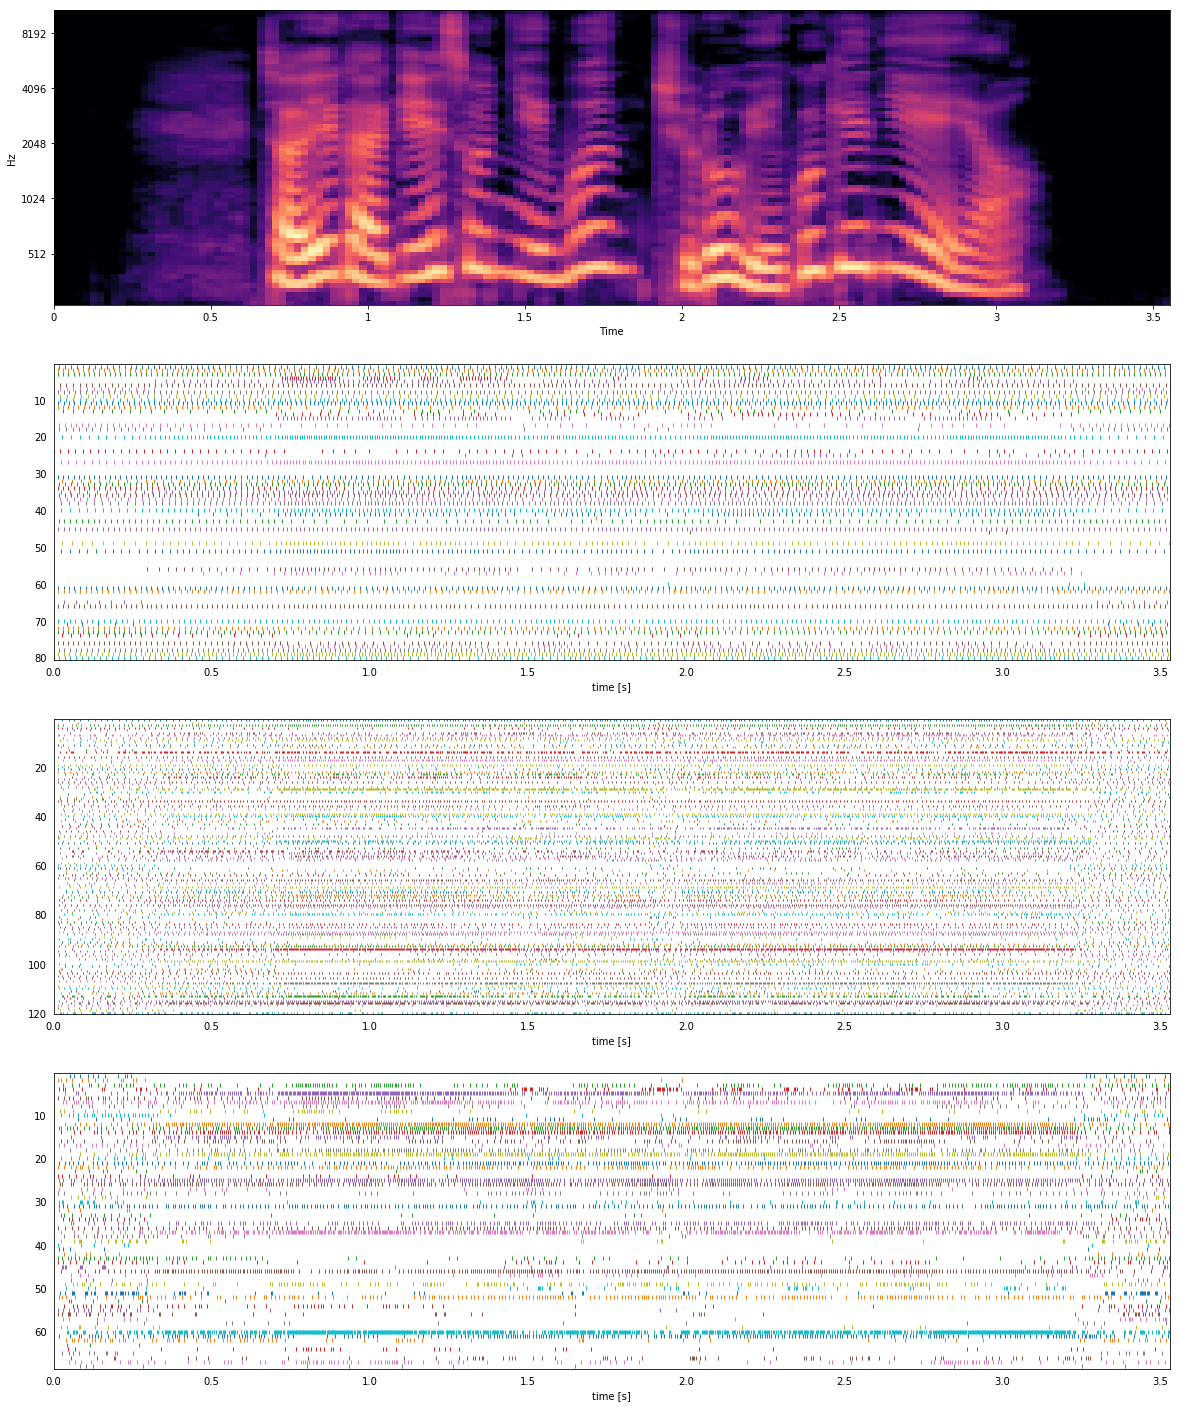

In [33]:
plt.figure(figsize=(20, 25))
plt.subplot(4, 1, 1)
librosa.display.specshow(norm_S, sr=sr, x_axis='time', y_axis='mel')

plt.subplot(4, 1, 2)
rasterplot(sim.trange(), sim.data[spike_probe])
plt.xlabel('time [s]');

plt.subplot(4, 1, 3)
rasterplot(sim.trange(), sim.data[spike_probe2])
plt.xlabel('time [s]');

plt.subplot(4, 1, 4)
rasterplot(sim.trange(), sim.data[spike_probe3])
plt.xlabel('time [s]');